In [ ]:
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!pip install -q swig
!pip install -q gymnasium[box2d]

from pyvirtualdisplay import Display
Display().start()

import gym
import torch
import torch.nn as nn
import torch.nn.functional as F

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install "gym[atari, accept-rom-license]"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446659 sha256=c2819a48d07a15a562935306522fd616abfeb6c8a60082e5fad0bead4a97d5cc
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


# 1 Занятие


Описание

Известная игра Atari. Динамика похожа на понг: вы перемещаете ракетку и ударяете мячом по кирпичной стене в верхней части экрана. Ваша цель — разрушить кирпичную стену. Вы можете попытаться проломить стену и позволить мячу сеять хаос на другой стороне, и все это самостоятельно! У вас пять жизней.

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
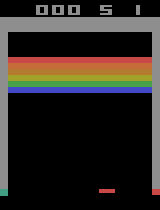

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import gym
env = gym.make("ALE/Breakout-v5")
env.reset()

In [ ]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Box(0, 255, (210, 160, 3), uint8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(env.unwrapped.get_action_meanings())


['NOOP', 'FIRE', 'RIGHT', 'LEFT']


In [ ]:
import random
import numpy as np
def epsilon_greedy_strategy(state, epsilon = 0.2):
  ball_x = state[48]
  paddle_x = state[50]
  if random.random() < epsilon:
    # Используем случайное действие с вероятностью epsilon
    return env.action_space.sample()
  elif np.any(ball_x > paddle_x):
    return 2  # движение вправо
  else:
    return 3  # движение влево
# Сохраняем траектории для каждого эпизода
trajectories = []

for i_episode in range(30):
    observation = env.reset()
    episode_trajectory = []
    for t in range(10000):
        action = epsilon_greedy_strategy(observation)
        observation, reward, done, info = env.step(action)
        print(reward)
        episode_trajectory.append((observation, action, reward))
        if done:
            print("Эпизод завершен после {} шагов".format(t+1))
            break
    trajectories.append(episode_trajectory)

env.close()

Эпизод завершен после 376 шагов
Эпизод завершен после 342 шагов
Эпизод завершен после 273 шагов
Эпизод завершен после 337 шагов
Эпизод завершен после 386 шагов
Эпизод завершен после 301 шагов
Эпизод завершен после 498 шагов
Эпизод завершен после 332 шагов
Эпизод завершен после 394 шагов
Эпизод завершен после 165 шагов
Эпизод завершен после 273 шагов
Эпизод завершен после 346 шагов
Эпизод завершен после 320 шагов
Эпизод завершен после 335 шагов
Эпизод завершен после 274 шагов
Эпизод завершен после 442 шагов
Эпизод завершен после 438 шагов
Эпизод завершен после 511 шагов
Эпизод завершен после 369 шагов
Эпизод завершен после 320 шагов
Эпизод завершен после 322 шагов
Эпизод завершен после 377 шагов
Эпизод завершен после 272 шагов
Эпизод завершен после 290 шагов
Эпизод завершен после 311 шагов
Эпизод завершен после 328 шагов
Эпизод завершен после 553 шагов
Эпизод завершен после 306 шагов
Эпизод завершен после 253 шагов
Эпизод завершен после 367 шагов


In [ ]:
episode_scores = [sum(x[2] for x in trajectory) for trajectory in trajectories]
mean_score = np.mean(episode_scores)

In [ ]:
import scipy.stats as stats

confidence_level = 0.95
degrees_of_freedom = len(episode_scores) - 1
sample_mean = np.mean(episode_scores)
sample_standard_error = stats.sem(episode_scores)

confidence_interval = stats.t.interval(confidence_level, degrees_of_freedom, sample_mean, sample_standard_error)

In [ ]:
print("Точечная оценка скора (J):", mean_score)
print(f"{confidence_level*100}% доверительный интервал для скора (J):", confidence_interval)

Точечная оценка скора (J): 6.4
95.0% доверительный интервал для скора (J): (5.245539534421944, 7.554460465578057)


In [ ]:
# Считаем общий скор для каждого эпизода
scores = [sum(x[2] for x in trajectory) for trajectory in trajectories]

# Точечная оценка - это просто среднее значение скора
mean_score = np.mean(scores)

# Интервальная оценка может быть получена с помощью стандартного отклонения
std_dev = np.std(scores)
confidence_interval = (mean_score - 1.96*std_dev/np.sqrt(len(scores)), mean_score + 1.96*std_dev/np.sqrt(len(scores)))

print(f'Точечная оценка: {mean_score}')
print(f'Интервальная оценка: {confidence_interval}')

Точечная оценка: 6.4
Интервальная оценка: (5.31224414503989, 7.487755854960111)


# 2 Занятие

## Алгоритм DQN (Value based)

Алгоритм DQN — это метод обучения с подкреплением без использования моделей и вне политики. Агент DQN — это агент обучения с подкреплением, основанный на ценности, который обучает критика оценивать ожидаемое дисконтированное совокупное долгосрочное вознаграждение при следовании оптимальной политике. DQN — это вариант Q-обучения, в котором есть целевой критик и буфер опыта.

In [ ]:
import collections
import cv2
import gym
import numpy as np
from PIL import Image
import torch



class DQNBreakout(gym.Wrapper):

    def __init__(self, render_mode='rgb_array', repeat=16, no_ops=0,
                 fire_first=False, device='cpu'):
        env = gym.make("BreakoutNoFrameskip-v4", render_mode=render_mode)

        super(DQNBreakout, self).__init__(env)

        self.repeat = repeat
        self.image_shape = (84,84)

        self.frame_buffer = []
        self.no_ops = no_ops
        self.fire_first = fire_first
        self.device = device
        self.lives = env.ale.lives()

    def step(self, action):
        total_reward = 0
        done = False

        for i in range(self.repeat):
            observation, reward, done, info = self.env.step(action)

            total_reward += reward

            current_lives = info['lives']

            # if current_lives < self.lives:
            #     total_reward = total_reward - 1
            self.lives = current_lives

                # print(f"Current reward: {total_reward} Lives: {self.lives}")

            self.frame_buffer.append(observation)

            if done:
                break

        max_frame = np.max(self.frame_buffer[-2:], axis=0)
        max_frame = self.process_observation(max_frame)
        max_frame = max_frame.to(self.device)

        total_reward = torch.tensor(total_reward).view(1, -1).float()
        total_reward = total_reward.to(self.device)

        done = torch.tensor(done).view(1, -1)
        done = done.to(self.device)

        return max_frame, total_reward, done, info

    def reset(self):
        self.frame_buffer = []
        observation = self.env.reset()

        #observation, _ = self.env.reset()
        self.lives = self.env.ale.lives()

        observation = self.process_observation(observation)

        return observation

    def process_observation(self, observation):

        img = Image.fromarray(observation)
        img = img.resize(self.image_shape)
        img = img.convert("L")
        img = np.array(img)
        img = torch.from_numpy(img)
        img = img.unsqueeze(0)
        img = img.unsqueeze(0)
        img = img / 255.0

        img = img.to(self.device)

        return img


In [ ]:
import torch.nn as nn


class AtariNet(nn.Module):

    def __init__(self, nb_actions=4):

        super(AtariNet, self).__init__()

        self.relu = nn.ReLU()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=(8, 8), stride=(4, 4))
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
        self.conv3 = nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))

        self.flatten = nn.Flatten()

        self.dropout = nn.Dropout(p=0.2)

        self.action_value1 = nn.Linear(3136, 1024)
        self.action_value2 = nn.Linear(1024, 1024)
        self.action_value3 = nn.Linear(1024, nb_actions)

        self.state_value1 = nn.Linear(3136, 1024)
        self.state_value2 = nn.Linear(1024, 1024)
        self.state_value3 = nn.Linear(1024, 1)


    def forward(self, x):
        x = torch.Tensor(x)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.flatten(x)
        state_value = self.relu(self.state_value1(x))
        state_value = self.dropout(state_value)
        state_value = self.relu(self.state_value2(state_value))
        state_value = self.dropout(state_value)
        state_value = self.relu(self.state_value3(state_value))

        action_value = self.relu(self.action_value1(x))
        action_value = self.dropout(action_value)
        action_value = self.relu(self.action_value2(action_value))
        action_value = self.dropout(action_value)
        action_value = self.relu(self.action_value3(action_value))

        output = state_value + (action_value - action_value.mean())

        return output

    def save_the_model(self, weights_filename='sample_data/models/latest.pt'):
        torch.save(self.state_dict(), weights_filename)


    def load_the_model(self, weights_filename='sample_data/models/latest.pt'):
        try:
            self.load_state_dict(torch.load(weights_filename))
            print(f"Successfully loaded weights file {weights_filename}")
        except:
            print(f"No weights file available at {weights_filename}")

In [ ]:
import torch
import random
import copy
import torch.optim as optim
import torch.nn.functional as F
import time
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
import os


class ReplayMemory:

    def __init__(self, capacity=10000, device='cpu'):
        self.capacity = capacity
        self.memory = []
        self.position = 0
        self.device = device
        self.memory_max_report = 0


    def insert(self, transition):
        transition = [item.to('cpu') for item in transition]

        if len(self.memory) < self.capacity:
            self.memory.append(transition)
        else:
            self.memory.remove(self.memory[0])
            self.memory.append(transition)

    def sample(self, batch_size):
        assert self.can_sample(batch_size)

        batch = random.sample(self.memory, batch_size)
        batch = zip(*batch)
        return [torch.cat(items).to(self.device) for items in batch]

    def can_sample(self, batch_size):
        return len(self.memory) >= batch_size * 10

    def __len__(self):
        return len(self.memory)

class Agent:

    def __init__(self, model, device='cpu', epsilon=1.0, min_epsilon=0.1, nb_warmup=10000, nb_actions=None, memory_capacity=10000, batch_size=32, learning_rate=0.00025):
        self.memory = ReplayMemory(device=device, capacity=memory_capacity)
        self.model = model
        self.target_model = copy.deepcopy(model).eval()
        self.epsilon = epsilon
        self.min_epsilon = min_epsilon
        self.epsilon_decay = 1 - (((epsilon - min_epsilon) / nb_warmup) * 2) # Find the right value to take epsilon to min_epsilon over 10000 steps
        self.batch_size = batch_size
        self.model.to(device)
        self.target_model.to(device)
        self.gamma = 0.99
        self.nb_actions = nb_actions

        self.optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

        print(f"Starting epsilon is {self.epsilon}")
        print(f"Epsilon decay is {self.epsilon_decay}")

        if not os.path.exists("sample_data/tensorboard_logdir"):
            os.makedirs("sample_data/tensorboard_logdir")
        if not os.path.exists("sample_data/models"):
            os.makedirs("sample_data/models")



    def get_action(self, state):
        if torch.rand(1) < self.epsilon:
            return torch.randint(self.nb_actions, (1, 1))
        else:
            av = self.model(state).detach()
            return torch.argmax(av, dim=-1, keepdim=True)

    def train(self, env, epochs, batch_identifier=0):
        stats = {'Returns': [], 'AvgReturns': [], 'EpsilonCheckpoint': []}

        plotter = LivePlot()


        writer = SummaryWriter(log_dir=f"sample_data/tensorboard_logdir/{datetime.now().strftime('%Y-%m-%d')}")

        for epoch in range(1, epochs + 1):
            state = env.reset()
            done = False
            ep_return = 0

            while not done:
                action = self.get_action(state)
                next_state, reward, done, info = env.step(action)

                self.memory.insert([state, action, reward, done, next_state])


                # QSA = Q-value, state, action
                if self.memory.can_sample(self.batch_size):
                    state_b, action_b, reward_b, done_b, next_state_b = self.memory.sample(self.batch_size)
                    qsa_b = self.model(state_b).gather(1, action_b)
                    next_qsa_b = self.target_model(next_state_b)
                    next_qsa_b = torch.max(next_qsa_b, dim=-1, keepdim=True)[0]
                    target_b = reward_b + ~done_b * self.gamma * next_qsa_b
                    loss = F.mse_loss(qsa_b, target_b)
                    self.model.zero_grad()
                    loss.backward()
                    self.optimizer.step()


                state = next_state
                ep_return += reward.item()

            writer.add_scalar(f'Returns: {batch_identifier}', ep_return, epoch)

            stats['Returns'].append(ep_return)

            if self.epsilon > self.min_epsilon:
                self.epsilon = self.epsilon * self.epsilon_decay

            if epoch % 10 == 0:
                self.model.save_the_model()
                print("")

                average_returns = np.mean(stats['Returns'][-100:])

                stats['AvgReturns'].append(average_returns)
                stats['EpsilonCheckpoint'].append(self.epsilon)

                if (len(stats['Returns'])) > 100:
                    print(f"Epoch: {epoch} - Average Return: {np.mean(stats['Returns'][-100:])} - Epsilon: {self.epsilon}")
                else:
                    print(f"Epoch: {epoch} - Episode Return: {np.mean(stats['Returns'][-1:])} - Epsilon: {self.epsilon}")
                plotter.update_plot(stats)
            if epoch % 100 == 0:
                self.target_model.load_state_dict(self.model.state_dict())

            if epoch % 1000 == 0:
                self.model.save_the_model(f"sample_data/models/model_iter_{epoch}.pt")


        return stats

    def test(self, env):

        # self.epsilon = 0


        for epoch in range(1, 3):
            state = env.reset()

            # Fire at the beginning of the test
            done = False

            for _ in range(1000):
                time.sleep(0.01)
                action = self.get_action(state)
                state, reward, done, info = env.step(action)
                if done:
                    break



In [ ]:
import matplotlib.pyplot as plt
import os
from datetime import datetime


class LivePlot:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlabel("Epoch x 10")
        self.ax.set_ylabel("Returns")
        self.ax.set_title("Returns over Epochs")

        self.data = None

        self.epochs = 0

    def update_plot(self, stats):
        self.data = stats['AvgReturns']
        self.eps_data = stats['EpsilonCheckpoint']

        self.epochs = len(self.data)

        self.ax.clear()
        self.ax.set_xlim(0, self.epochs)
        # self.ax.set_ylim(min(self.data) - 0.5, max(self.data) + 0.5)

        self.ax.plot(self.data, 'b-', label='Returns')
        self.ax.plot(self.eps_data, 'r-', label='Epsilon')
        self.ax.legend(loc="upper left")

        if not os.path.exists("sample_data/plots"):
            os.makedirs("sample_data/plots")

        current_date = datetime.now().strftime('%Y-%m-%d')
        self.fig.savefig(f"sample_data/plots/plot_{current_date}.png")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Successfully loaded weights file sample_data/models/latest.pt
Starting epsilon is 1.0
Epsilon decay is 0.964

Epoch: 10 - Episode Return: 2.0 - Epsilon: 0.6930592097301767

Epoch: 20 - Episode Return: 0.0 - Epsilon: 0.48033106819181703

Epoch: 30 - Episode Return: 2.0 - Epsilon: 0.33289787052987224

Epoch: 40 - Episode Return: 3.0 - Epsilon: 0.23071793507029198

Epoch: 50 - Episode Return: 2.0 - Epsilon: 0.15990118975039477

Epoch: 60 - Episode Return: 2.0 - Epsilon: 0.1108209922033236

Epoch: 70 - Episode Return: 3.0 - Epsilon: 0.09927802659883893

Epoch: 80 - Episode Return: 1.0 - Epsilon: 0.09927802659883893

Epoch: 90 - Episode Return: 1.0 - Epsilon: 0.09927802659883893

Epoch: 100 - Episode Return: 2.0 - Epsilon: 0.09927802659883893

Epoch: 110 - Average Return: 1.66 - Epsilon: 0.09927802659883893

Epoch: 120 - Average Return: 1.7 - Epsilon: 0.09927802659883893

Epoch: 130 - Average Return: 1.79 - Epsilon: 0.09927802659883893

Epoch: 140 - Average Return: 1.69 - Epsilon: 0.0992780

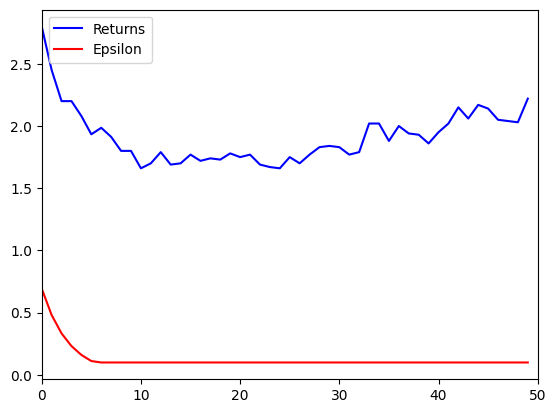

In [ ]:
import torch
import os


os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

environment = DQNBreakout(device=device)

model = AtariNet(nb_actions=4)

model.load_the_model()

agent = Agent(model=model,
              device=device,
              epsilon=1.0,
              min_epsilon=0.1,
              nb_warmup=50, # was 5000
              nb_actions=4,
              learning_rate=0.001,#0.00001,
              memory_capacity=100000,
              batch_size=64)


data = agent.train(env=environment, epochs=500, batch_identifier=0)
#test_environment = DQNBreakout(device=device)

#agent.test(env=test_environment)



#display_observation_image(state)


In [ ]:
episode_scores = data['Returns']
mean_score = np.mean(episode_scores)

In [ ]:
def confidence_interval(data, significance):
    mean = np.mean(data)
    std = np.std(data)

    n = len(data)
    if significance == 0.1:
        z = 1.28
    elif significance == 0.05:
        z = 1.96

    # Вычисляем доверительный интервал
    moe = z * (std/np.sqrt(n)) # Margin of Error
    confidence_interval = (mean - moe, mean + moe)
    return confidence_interval

In [ ]:
confidence_level = 0.05

print(f"{100. - confidence_level*100}% доверительный интервал для скора (J):", confidence_interval(episode_scores, confidence_level))
confidence_level = 0.1
print(f"{100. - confidence_level*100}% доверительный интервал для скора (J):", confidence_interval(episode_scores, confidence_level))



95.0% доверительный интервал для скора (J): (1.4992364525881454, 2.1207635474118547)
90.0% доверительный интервал для скора (J): (1.6070523772004215, 2.0129476227995786)


# 3 Занятие

## Monte Carlo Policy Gradient

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment Breakout-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommende

EP: 0 Score: 5.0          [0.24922333 0.25003025 0.25072114 0.25002528]
EP: 10 Score: -10.0          [0.23503926 0.2509123  0.26455763 0.24949082]
EP: 20 Score: -10.0          [0.22301954 0.25133148 0.27689143 0.24875755]
EP: 30 Score: 1.0          [0.24700307 0.25040568 0.2525398  0.25005145]
EP: 40 Score: 1.0          [0.24059576 0.25161578 0.25832085 0.24946761]
EP: 50 Score: -10.0          [0.22321802 0.25384561 0.27467265 0.24826372]
EP: 60 Score: 1.0          [0.24911582 0.25017331 0.25072978 0.24998109]
EP: 70 Score: -10.0          [0.24343249 0.25130053 0.25549058 0.2497764 ]
EP: 80 Score: 1.0          [0.23088094 0.25407042 0.26653349 0.24851516]
EP: 90 Score: 1.0          [0.23154574 0.25462774 0.2659626  0.24786391]
EP: 100 Score: 6.0          [0.22214422 0.25725919 0.27422792 0.24636867]
EP: 110 Score: 3.0          [0.24075665 0.25232539 0.25833153 0.24858644]
EP: 120 Score: 1.0          [0.2390775  0.25276522 0.25956627 0.24859102]
EP: 130 Score: 1.0          [0.22186475 0

ValueError: x and y must have same first dimension, but have shapes (1000,) and (100,)

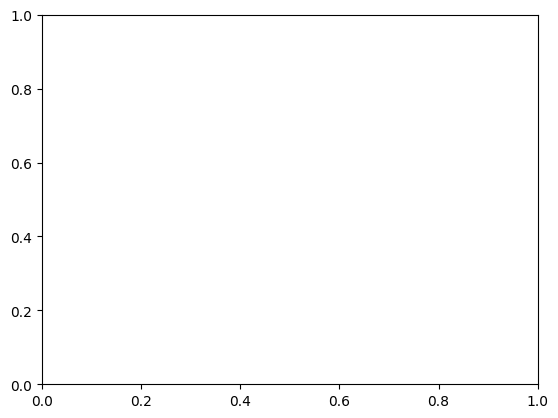

In [ ]:
from pylab import *  #includes numpy
import numpy as np
import gym
import matplotlib.pyplot as plt

#Hyperparameters
NUM_EPISODES = 1000
LEARNING_RATE = 0.0001
GAMMA = 0.99

#Initializations
env = gym.make('Breakout-v0')
env.reset()
nA = 4
dim = 2 #ball position x*width + ball pos y and player position
# Init weight
w = np.random.rand(dim, nA)

# Keep stats for final print of graph
episode_rewards = []

# extract_state checks the image extracts the state
# which consists of the x,y position of the ball and
# x position of the player
def extract_state(I):
    I = preprocess(I)
    found_ball = False
    ball_pos = [0,0]
    for i in range(0,len(I) - 4): # the last 3 rows have the block
        # 13,14,15 row is a red tile row we skip this row as its the same color as the ball
        for j in range(0,len(I[i])):
            if I[i][j] == 114 and i == 14 :
                continue
            if I[i][j] == 114 :
                if I[i+1][j] == 114:
                    found_ball = True
                    ball_pos = [i,j]
                    if I[i+2][j] == 114:
                        found_ball = False
                        ball_pos = [0,0]
                        if I[i+3][j] == 114 and I[i+4][j] == 114:
                            found_ball = True
                            ball_pos = [i,j]
    player_pos = 0
    for i in range(len(I)-3,len(I)): # find the position of the player in the last 3 rows
        for j in range(0,len(I[i])-2): # 8 is the length of the player
            # print(I[i][j:j+8],end=" ")
            if(np.sum(I[i][j:j+2]) == 114*2):
                player_pos = j+2
                break
        # print()
    # print(ball_pos,player_pos)
    return [(ball_pos[0]*72+ball_pos[1])/(82*72),(player_pos)/72]

def to_grayscale(img):
    return np.mean(img, axis=2).astype(np.uint8)

def downsample(img):
    return img[::2, ::2]

# preprocess reduces the size, crops the borders and the score and gives just the playable part
def preprocess(img):
    img = to_grayscale(downsample(img))
    img = img[9+7:(len(img)-7)] # 9 is the score part which we crop and 7 border size in top and bottom
    for i in range(4): # border size is 4
        img = np.delete(img,0,1)
        img = np.delete(img,len(img[0])-1,1)
    return img

# Our policy that maps state to action parameterized by w
def policy(state,w):
    z = state.dot(w)
    # print("z",z)
    exp = np.exp(z/2)
    # print("ha",exp/np.sum(exp))
    return exp/np.sum(exp)

# Vectorized softmax Jacobian
def softmax_grad(softmax):
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

fout = open("Breakout_ret_RL",'w')
foutstep =open("Breakout_step_RL","w")
for e in range(NUM_EPISODES):

    state = env.reset()
    state = np.asarray(extract_state(state))[None,:]
    grads = []
    rewards = []
    # Keep track of game score to print
    score = 0
    st =0
    while True:

		# Uncomment to see your model train in real time (slower)
		    #env.render()
        #env.render()

		# Sample from policy and take action in environment
        probs = policy(state,w)
        # print(state)
        # print(probs)
        action = np.random.choice(nA,p=probs[0])
        next_state,reward,done,_ = env.step(action)
        st+=1
        if(score==0 and done == True):
            reward=-10
        # print(extract_state(next_state),end=" ")
        next_state = np.asarray(extract_state(next_state))[None,:]

        # Compute gradient and save with reward in memory for our weight updates
        dsoftmax = softmax_grad(probs)[action,:]
        dlog = dsoftmax / probs[0,action]
        grad = state.T.dot(dlog[None,:])

        grads.append(grad)
        rewards.append(reward)

        score+=reward

        # Dont forget to update your old state to the new state
        state = next_state

        if done or score < -1000:
            break

	# Weight update
    for i in range(len(grads)):

		# Loop through everything that happend in the episode and update towards the log policy gradient times **FUTURE** reward
        w += LEARNING_RATE * grads[i] * sum([ r * (GAMMA ** r) for t,r in enumerate(rewards[i:])])
	# Append for logging and print
    if e%10 == 0:
      episode_rewards.append(score)
      fout.write(str(score))
      fout.write('\n')
      foutstep.write(str(st))
      foutstep.write('\n')
      print("EP: " + str(e) + " Score: " + str(score) + "         ",probs[0])

fout.close()
foutstep.close()
plt.plot(np.arange(NUM_EPISODES),episode_rewards)
plt.title("MountainCar a=0.000025")
plt.show()
env.close()

2.5954999999999995


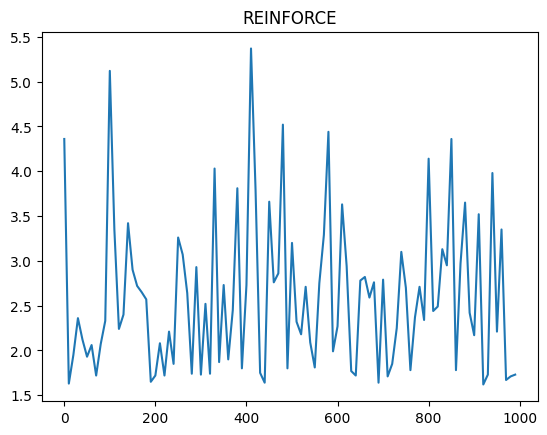

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fil = open("Breakout_step_RL")
ret_RL = []
for line in fil:
    x = float(line)
    if(x==-10):
        x=0
    ret_RL.append(x/100)
fil.close()

print(np.average(ret_RL))
plt.plot(np.arange(0, 1000, 10), ret_RL)
plt.title("REINFORCE")
plt.show()

In [ ]:
episode_scores = ret_RL
mean_score = np.mean(episode_scores)

In [ ]:
def confidence_interval(data, significance):
    mean = np.mean(data)
    std = np.std(data)

    n = len(data)
    if significance == 0.1:
        z = 1.28
    elif significance == 0.05:
        z = 1.96

    # Вычисляем доверительный интервал
    moe = z * (std/np.sqrt(n)) # Margin of Error
    confidence_interval = (mean - moe, mean + moe)
    return confidence_interval

In [ ]:
confidence_level = 0.05

print(f"{100. - confidence_level*100}% доверительный интервал для скора (J):", confidence_interval(episode_scores, confidence_level))
confidence_level = 0.1
print(f"{100. - confidence_level*100}% доверительный интервал для скора (J):", confidence_interval(episode_scores, confidence_level))



95.0% доверительный интервал для скора (J): (2.4312956555629537, 2.7597043444370453)
90.0% доверительный интервал для скора (J): (2.488264509755398, 2.702735490244601)
